In [105]:
import sys 
# sys.path.append('/Users/geenaildefonso/Projects/NERM')
sys.path.append('../')
sys.path.append('/home/ildefog/main/Projects/NERM/')
from model_files.nerm import model as model
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
# from necro_pydream_model_file_8920 import model
from pysb.simulator import ScipyOdeSimulator
import numpy as np
from scipy.stats import norm,uniform
import seaborn as sns
from matplotlib import pyplot as plt
import random
import os
from pylab import *
from pysb.core import *
from pysb.bng import *
from pysb.integrate import *
import matplotlib.pyplot as plt
import numpy as np
from pysb.util import alias_model_components
from scipy import stats
from pysb.simulator import SimulationResult
import pandas as pd
import seaborn as sns

In [37]:
clus0_100 = np.load('../necro_pars10k_cluster0_5720_mod.npy')
clus1_100 = np.load('../necro_pars10k_cluster1_5720_mod.npy')
clus2_100 = np.load('../necro_pars10k_cluster2_5720_mod.npy')
clus3_100 = np.load('../necro_pars10k_cluster3_5720_mod.npy')
pars = np.load('../necro_pars10k_allclusmod.npy')

In [103]:
tspan = np.linspace(0, 1440, 500)

In [108]:
mode1_100 = np.load('../param_files/necro_pars10k_cluster1_5720_mod.npy')
mode2_100 = np.load('../param_files/necro_pars10k_cluster2_5720_mod.npy')
mode3_100 = np.load('../param_files/necro_pars10k_cluster3_5720_mod.npy')
mode4_100 = np.load('../param_files/necro_pars10k_cluster4_5720_mod.npy')

In [5]:
m = model.components
o = model.monomers

In [ ]:
A20_obs0 = wtclus100.observable(o.A20(brip = None))
A20_obs1 = wtclus10.observable(o.A20(brip = None))
A20_obs2 = wtclus1.observable(o.A20(brip = None))
A20_obs3 = wtclus01.observable(o.A20(brip = None))

In [ ]:
CYLD_obs0 = wtclus100.observable(o.CYLD(brip=None, btraf = None))
CYLD_obs1 = wtclus10.observable(o.CYLD(brip=None, btraf = None))
CYLD_obs2 = wtclus1.observable(o.CYLD(brip=None, btraf = None))
CYLD_obs3 = wtclus01.observable(o.CYLD(brip=None, btraf = None))

In [6]:
solverwt100 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
wtclus100 = solverwt100.run(param_values=mode1_100, num_processors = 20)
# wtclus0.save('h5files5720/pydyno_s36prod_5k_5620_100tnf_cluster0pars_72hrwt.h5',include_obs_exprs = True)
m1df100wt100 = wtclus100.dataframe

2021-11-15 13:49:30.476 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2021-11-15 13:49:31.243 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2021-11-15 13:49:31.363 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2021-11-15 13:49:31.598 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2021-11-15 13:54:07.844 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2021-11-15 13:54:07.846 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2021-11-15 13:54:09.801 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


In [38]:
solver = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
wtallpars = solver.run(param_values = pars, num_processors = 20)
wtallparstnf100 = wtallpars.dataframe

2021-11-15 21:37:07.342 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2021-11-15 21:37:07.353 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2021-11-15 21:37:07.423 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2021-11-15 21:37:07.988 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2021-11-15 22:07:38.713 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2021-11-15 22:07:38.715 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2021-11-15 22:07:44.749 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


In [ ]:
plt.figure()
plt.plot(tspan/60, A20_obs1)

In [53]:
df_threshtimesflip = wtallparstnf100.groupby('simulation').apply(lambda x: (x > 0).idxmax()).apply(lambda x: [y[1] for y in x])

In [54]:
clus0 = pd.DataFrame({'flip': df_threshtimesflip['Flip_obs']})

In [55]:
dfclus0 = pd.DataFrame(data = clus0, columns = ['flip'])
dfclus0 = pd.melt(dfclus0)

In [ ]:
wtallparstnf100['Flip_obs']

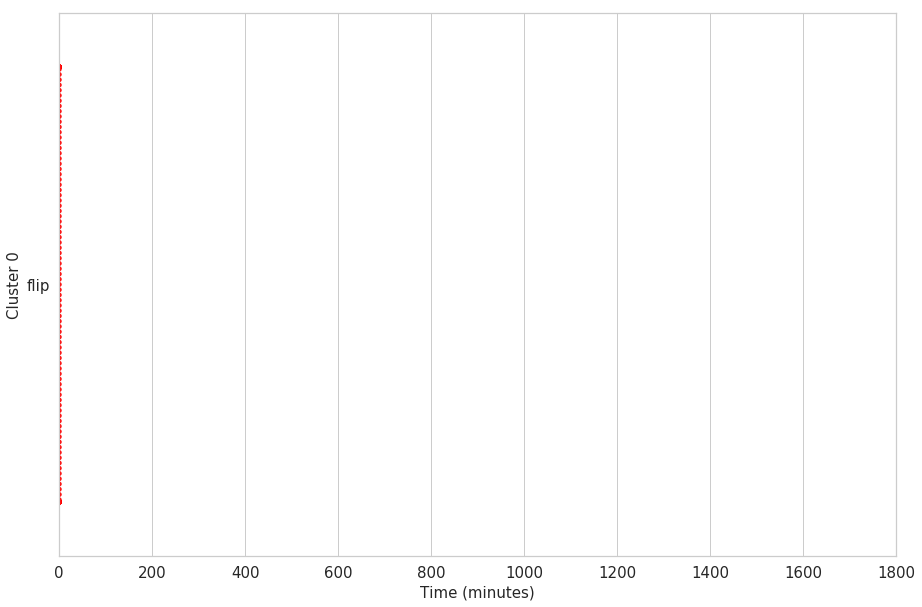

In [56]:
sns.set(style="whitegrid")
plt.figure(figsize = (15,10))
my_pal = {"flip": "red"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.swarmplot(x="value", y="variable", data=wtallparstnf100['Flip_obs'], zorder=2, palette=my_pal)
b.set_xlabel("Time (minutes)",fontsize=15)
b.set_ylabel("Cluster 0",fontsize=15)
b.tick_params(labelsize=15)
plt.xlim(xmax = 1800, xmin = 0)
# plt.savefig('figs/pmlkl_100tnf_clus0box_wswarm_5720_mod.pdf')
plt.show()

(array([4.748000e+03, 3.330000e+03, 4.747000e+03, 8.767000e+03,
        1.081500e+04, 1.675300e+04, 2.780900e+04, 4.765200e+04,
        9.995400e+04, 4.744987e+06]),
 array([0.02589744, 0.12330769, 0.22071795, 0.31812821, 0.41553846,
        0.51294872, 0.61035897, 0.70776923, 0.80517949, 0.90258974,
        1.        ]),
 <a list of 10 Patch objects>)

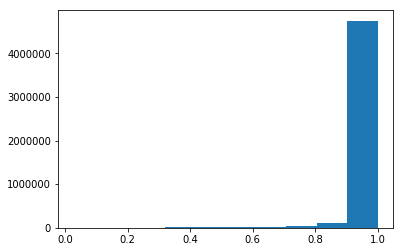

In [52]:
plt.hist(wtallparstnf100['Flip_obs'].iloc[:]/3900)

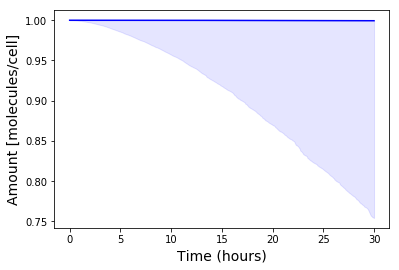

In [51]:
df = pd.concat([wtallparstnf100],
               keys=['flip'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot = {
    ('Flip_obs', 'flip'): 'blue'
}

lower_quantile = 0.05  # 10%
upper_quantile = 1.0  # 90%
median = 0.5

fig, ax = plt.subplots()
# plt.figure()
legend_keys = []
for obs_pair, colour in obs_to_plot.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
    ax.plot(time_hrs, quantile_data.loc[:, median]/3900, color=colour)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile]/3900,
                    quantile_data.loc[:, upper_quantile]/3900,
                    color=colour,
                    alpha=.1)
# Add the legend

# plt.legend([f'{obs} {group}' for obs, group in obs_to_plot.keys()])
# plt.title('Flip vs C8 KO Cluster 3 with 100ng/ml of TNF',fontsize=14) # Title
plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
plt.xlabel('Time (hours)', fontsize = 14) # X label
# plt.xlim(xmin = 0)
# plt.ylim(ymin = 0)
# custom_lines = [Line2D([0], [0], color='blue', lw=4),
#                 Line2D([0], [0], color='red', lw=4),
#                 Line2D([0], [0], color='orange', lw=4),
#                 Line2D([0], [0], color='black', lw=4)]
# plt.legend(custom_lines, ['WT', 'FlipKO', 'C8KO', 'Data'], prop={'size': 10}, loc = 'best')
# fig.savefig("updatedkos/necro_10k_5720_clus3medc8flipko_100tnf.pdf")
plt.show()

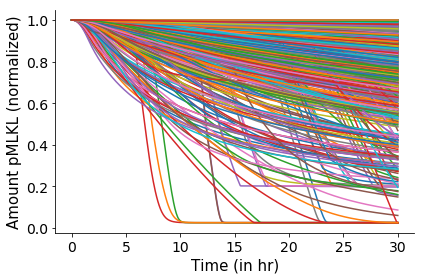

In [41]:
fig, ax = plt.subplots()
for n in range(len(clus0_100)):
    plt.plot(tspan/60, c0df100wt100.loc[n]['Flip_obs'].iloc[:]/3900, lw=1.5, 
             zorder = 1)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount pMLKL (normalized)", fontsize=15)
# plt.xlim(xmin = 0, xmax = 24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
# plt.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
plt.tight_layout()
plt.xlim(xmin = 0)
plt.ylim(ymin = 0)
# plt.savefig('pmlkl_allpars_clus0_tnf100_noframe.pdf')
plt.show() 

In [39]:
flip_tnf10 = []
clus_idxs = np.array(range(wtallpars.nsims))
for idx in clus_idxs: 
    mlkl_traj = wtallpars.observables[idx]['Flip_obs']
    ysim_mlkl_norm = mlkl_traj / np.nanmax(mlkl_traj)
    st, sc, sk = scipy.interpolate.splrep(tspan, ysim_mlkl_norm)
    try:
        t10 = scipy.interpolate.sproot((st, sc - 0.10, sk))[0]
        t90 = scipy.interpolate.sproot((st, sc - 0.90, sk))[0]
    except IndexError:
        t10 = 0
        t90 = 0

    # time of death  = halfway point between 10 and 90%
    td = (t10 + t90) / 2
    flip_tnf10.append(td)

clus 3.021856999110964
clus 58.39674201442602


(array([9.97e+03, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        1.00e+00, 1.00e+00, 3.00e+00, 0.00e+00, 1.00e+00, 4.00e+00,
        1.00e+00, 3.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 2.00e+00,
        1.00e+00, 3.00e+00, 2.00e+00, 1.00e+00, 1.00e+00, 3.00e+00,
        2.00e+00]),
 array([   0.        ,   62.41242236,  124.82484472,  187.23726708,
         249.64968944,  312.06211179,  374.47453415,  436.88695651,
         499.29937887,  561.71180123,  624.12422359,  686.53664595,
         748.94906831,  811.36149066,  873.77391302,  936.18633538,
         998.59875774, 1061.0111801 , 1123.42360246, 1185.83602482,
        1248.24844718, 1310.66086953, 1373.07329189, 1435.48571425,
        1497.89813661, 1560.31055897]),
 <a list of 25 Patch objects>)

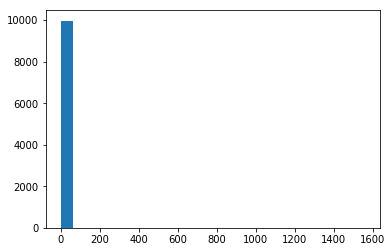

In [42]:
print('clus', np.mean(flip_tnf10))
print('clus', np.std(flip_tnf10))
plt.hist(flip_tnf10, label='uncluster', bins=25)

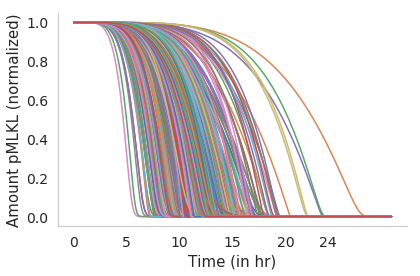

In [102]:
fig, ax = plt.subplots()
for n in range(len(clus0_100)):
    plt.plot(tspan/60, 1-(c0df100wt100.loc[n]['MLKLa_obs'].iloc[:]/5544), lw=1.5, 
             zorder = 1)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount pMLKL (normalized)", fontsize=15)
# plt.xlim(xmin = 0, xmax = 24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.set_xticks([0, 5, 10, 15, 20, 24])
ax.grid(False)
plt.tight_layout()
# plt.savefig('pmlkl_allpars_clus0_tnf100_noframe.pdf')
plt.show()  

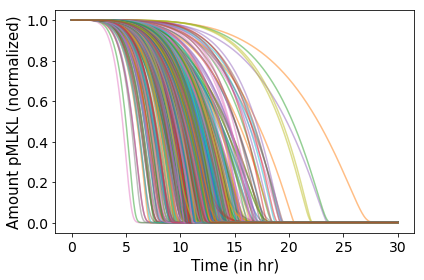

In [31]:
fig, ax = plt.subplots()
for n in range(len(clus0_100)):
    plt.plot(tspan/60, 1-(c0df100wt100.loc[n]['MLKLa_obs'].iloc[:]/5544), lw=1.5, 
             zorder = 1, alpha = 0.5)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount pMLKL (normalized)", fontsize=15)
# plt.xlim(xmin = 0, xmax = 24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# right_side = ax.spines["right"]
# right_side.set_visible(False)
# top = ax.spines["top"]
# top.set_visible(False)
# plt.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
plt.tight_layout()
plt.savefig('pmlkl_allpars_clus0_tnf100_frame.pdf')
plt.show() 

In [99]:
solverwt10 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
wtclus10 = solverwt10.run(initials = {m.TNF(brec=None):233}, param_values=pars, num_processors = 20)
# wtclus0.save('h5files5720/pydyno_s36prod_5k_5620_100tnf_cluster0pars_72hrwt.h5',include_obs_exprs = True)
c0df100wt10 = wtclus10.dataframe

2021-11-22 20:52:23.108 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2021-11-22 20:52:23.116 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2021-11-22 20:52:23.179 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2021-11-22 20:52:24.294 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
Process ForkProcess-110:
Process ForkProcess-101:
Process ForkProcess-113:
Process ForkProcess-102:
Process ForkProcess-111:
Process ForkProcess-120:
Process ForkProcess-109:
Process ForkProcess-103:
Process ForkProcess-115:
Process ForkProcess-112:
Process ForkProcess-108:
Process ForkProcess-118:
Process ForkProcess-105:
Process ForkProcess-116:
Process ForkProcess-117:
Process ForkProcess-119:
Process ForkProcess-114:
Process ForkProcess-107:
Process ForkProcess-104:
Process ForkProcess-106:
Traceback (most recent call last):
Traceback (most recent call l

  File "/home/jupyterhub/miniconda3/lib/python3.7/concurrent/futures/process.py", line 233, in _process_worker
    call_item = call_queue.get(block=True)
  File "/home/jupyterhub/miniconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/jupyterhub/miniconda3/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/jupyterhub/miniconda3/lib/python3.7/multiprocessing/queues.py", line 93, in get
    with self._rlock:
  File "/home/jupyterhub/miniconda3/lib/python3.7/concurrent/futures/process.py", line 233, in _process_worker
    call_item = call_queue.get(block=True)
  File "/home/jupyterhub/miniconda3/lib/python3.7/concurrent/futures/process.py", line 233, in _process_worker
    call_item = call_queue.get(block=True)
  File "/home/jupyterhub/miniconda3/lib/python3.7/concurrent/futures/process.py", line 233, in _process_worker
    call_item = call_queue.g

KeyboardInterrupt: 

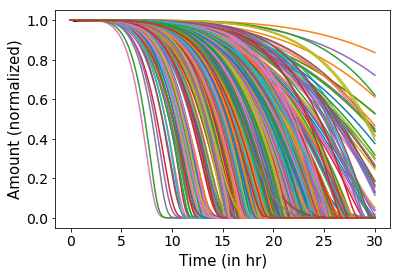

In [22]:
plt.figure()
for n in range(len(clus0_100)):
    plt.plot(tspan/60, 1-(c0df100wt10.loc[n]['MLKLa_obs'].iloc[:]/5544), lw=1.5,  zorder = 1)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount (normalized)", fontsize=15)
# plt.xlim(xmin = 0, xmax = 24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()  

In [ ]:
solverwt1 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
wtclus1 = solverwt1.run(initials = {m.TNF(brec=None):23}, param_values=pars, num_processors = 20)
# wtclus0.save('h5files5720/pydyno_s36prod_5k_5620_100tnf_cluster0pars_72hrwt.h5',include_obs_exprs = True)
c0df100wt1 = wtclus1.dataframe

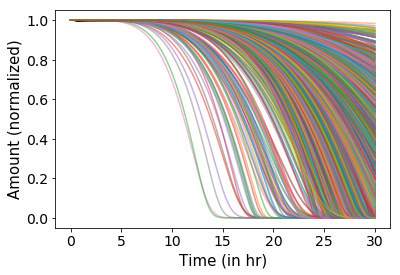

In [19]:
plt.figure()
for n in range(len(clus0_100)):
    plt.plot(tspan/60, 1-(c0df100wt1.loc[n]['MLKLa_obs'].iloc[:]/5544), lw=1.5, zorder = 1, alpha = 0.5)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount (normalized)", fontsize=15)
# plt.xlim(xmin = 0, xmax = 24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()  

In [ ]:
solverwt01 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
wtclus01 = solverwt01.run(initials = {m.TNF(brec=None):2}, param_values=pars, num_processors = 20)
# wtclus0.save('h5files5720/pydyno_s36prod_5k_5620_100tnf_cluster0pars_72hrwt.h5',include_obs_exprs = True)
c0df100wt01 = wtclus01.dataframe

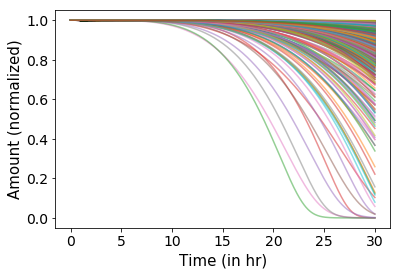

In [18]:
plt.figure()
for n in range(len(clus0_100)):
    plt.plot(tspan/60, 1-(c0df100wt01.loc[n]['MLKLa_obs'].iloc[:]/5544), lw=1.5, zorder = 1, alpha = 0.5)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount (normalized)", fontsize=15)
# plt.xlim(xmin = 0, xmax = 24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()  

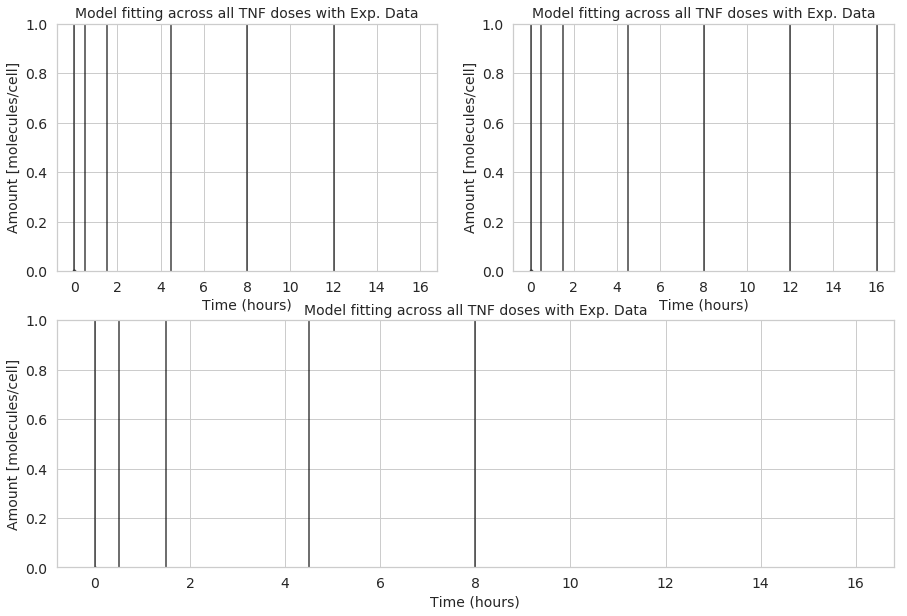

In [60]:
import matplotlib.pyplot as plt
x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, 0.98])

x101 = np.array([0, 30, 90, 270, 480])
x102 = np.array([720, 960])
y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868])
y102 = np.array([0.17, 0.47])

x1 = np.array([0, 30, 90, 270,480, 720])
x2 = np.array([960])
y2 = np.array([0.109561346])
y1 = np.array([0,0.085233734,0.006063293,0.009426917,0.011334223, 0.02])

x01 = np.array([0, 30, 90, 270,480, 720, 960])
y01 = np.array([0, 0.006714721,0.007776423,0.00919829,0.001772636, 0.005, 0.013633013])

# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df1 = pd.concat([wtclus100.dataframe],
               keys=['wt100'],
               names=['group', 'simulation', 'time'])
df2 = pd.concat([wtclus10.dataframe],
               keys=['wt10'],
               names=['group', 'simulation', 'time'])
df3 = pd.concat([wtclus1.dataframe],
               keys=['wt1'],
               names=['group', 'simulation', 'time'])
df4 = pd.concat([wtclus01.dataframe],
               keys=['wt01'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot1 = {
    ('MLKLa_obs', 'wt100'): 'blue'
}
obs_to_plot2 = {
    ('MLKLa_obs', 'wt10'): 'orange'
}
obs_to_plot3 = {
    ('MLKLa_obs', 'wt1'): 'green'
}
obs_to_plot4 = {
    ('MLKLa_obs', 'wt01'): 'red'
}

lower_quantile = 0.1  # 10%
upper_quantile = 0.9  # 90%
median = 0.5

matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15,10))
plt.subplot(211)
# legend_keys = []
for obs_pair, colour in obs_to_plot1.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df1[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
    ax1.plot(time_hrs, quantile_data.loc[:, median], color=colour)
    # Plot the 10% and 90% quantiles as an envelope
    ax1.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour,
                    alpha=.1)
    plt.title('Model fitting across all TNF doses with Exp. Data',fontsize=14) # Title
    plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
    plt.xlabel('Time (hours)', fontsize = 14) # X label
    # plt.xlim(xmax =24)
    plt.ylim(ymin = 1e-3)
    #100 TNF
    plt.errorbar(x1001/60, y1001*5544,
                 yerr=[(0, 0.00885691708746097*5544,0.0161886154261265*5544,0.0373005242261882*5544),
                 (400,400,400,400)],
                       fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
    plt.errorbar(x1002/60, y1002*5544,
                 yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.subplot(212)
legend_keys = []
for obs_pair, colour in obs_to_plot2.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df2[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
    ax2.plot(time_hrs, quantile_data.loc[:, median], color=colour)
    # Plot the 10% and 90% quantiles as an envelope
    ax2.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour,
                    alpha=.1)
    plt.title('Model fitting across all TNF doses with Exp. Data',fontsize=14) # Title
    plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
    plt.xlabel('Time (hours)', fontsize = 14) # X label
    # plt.xlim(xmax =24)
    plt.ylim(ymin = 1e-3)
    #10TNF
    plt.errorbar(x101/60, y101*5544,
                 yerr=[(0, 0.0106013664572332*5544,0.00519576571714913*5544,0.02967443048221*5544,
                        0.050022163974868*5544),
                 (400,400,400,400,400)],
                       fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
    plt.errorbar(x102/60, y102*5544,
                 yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.subplot(221)
legend_keys = []
for obs_pair, colour in obs_to_plot3.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df3[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
    ax3.plot(time_hrs, quantile_data.loc[:, median], color=colour)
    # Plot the 10% and 90% quantiles as an envelope
    ax3.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour,
                    alpha=.1)
    plt.title('Model fitting across all TNF doses with Exp. Data',fontsize=14) # Title
    plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
    plt.xlabel('Time (hours)', fontsize = 14) # X label
    # plt.xlim(xmax =24)
    plt.ylim(ymin = 1e-3)
    #1TNF
    plt.errorbar(x1/60, y1*5544,
                 yerr=[(0,0.085233734*5544,0.006063293*5544,0.009426917*5544,0.011334223*5544,
                        0.02*5544),(400,400,400,400,400,400)],
                       fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)

    plt.errorbar(x2/60, y2*5544,
                 yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.subplot(222)
legend_keys = []
for obs_pair, colour in obs_to_plot4.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df4[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
    ax4.plot(time_hrs, quantile_data.loc[:, median], color=colour)
    # Plot the 10% and 90% quantiles as an envelope
    ax4.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour,
                    alpha=.1)
    plt.title('Model fitting across all TNF doses with Exp. Data',fontsize=14) # Title
    plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
    plt.xlabel('Time (hours)', fontsize = 14) # X label
    # plt.xlim(xmax =24)
    plt.ylim(ymin = 1e-3)
    #01 TNF
    plt.errorbar(x01/60, y01*5544,
                  yerr=[(0, 0.006714721*5544,0.007776423*5544,0.00919829*5544,0.001772636*5544,
                        0.005*5544, 0.013633013*5544), (400,400,400,400,400,400,400)],
                       fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# custom_lines = [Line2D([0], [0], color='blue', lw=4),
#                 Line2D([0], [0], color='orange', lw=4),
#                 Line2D([0], [0], color='green', lw=4),
#                 Line2D([0], [0], color='red', lw=4),
#                 Line2D([0], [0], color='black', lw=4)]
# plt.legend(custom_lines, ['100','10','1','0.1','Data'], prop={'size': 10}, loc = 'best')
# fig.savefig("updatedkos/necro_10k_5720_wdata_alltnf.pdf")
plt.show()

In [82]:
x101 = np.array([0, 30, 90, 270, 480])
x102 = np.array([720, 960])
y101 = np.array([0, 0.00519576571714913,0.0106013664572332, 0.02967443048221,0.050022163974868])
y102 = np.array([0.17, 0.47])

x1 = np.array([0, 30, 90, 270,480, 720])
x2 = np.array([960])
y2 = np.array([0.109561346])
y1 = np.array([0,0.006063293, 0.009426917, 0.085233734,,0.011334223, 0.02])

x01 = np.array([0, 30, 90, 270,480, 720, 960])
y01 = np.array([0, 0.001772636, 0.006714721,0.007776423,0.00919829, 0.005, 0.013633013])

SyntaxError: invalid syntax (<ipython-input-82-e3d43f59c18f>, line 14)

In [ ]:
x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, 0.98])

x101 = np.array([0, 30, 90, 270, 480])
x102 = np.array([720, 960])
y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868])
y102 = np.array([0.17, 0.47])

x1 = np.array([0, 30, 90, 270,480, 720])
x2 = np.array([960])
y2 = np.array([0.109561346])
y1 = np.array([0,0.085233734,0.006063293,0.009426917,0.011334223, 0.02])

x01 = np.array([0, 30, 90, 270,480, 720, 960])
y01 = np.array([0, 0.006714721,0.007776423,0.00919829,0.001772636, 0.005, 0.013633013])

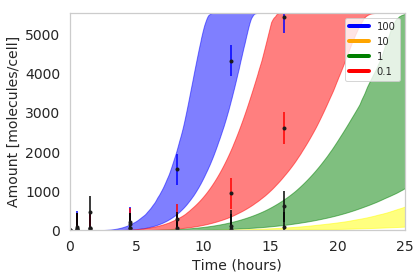

In [86]:
# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df = pd.concat([c0df100wt100, c0df100wt10, c0df100wt1,c0df100wt01],
               keys=['wt100','wt10','wt1','wt01' ],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot = {
    ('MLKLa_obs', 'wt100'): 'blue',
    ('MLKLa_obs', 'wt10'): 'red',
    ('MLKLa_obs', 'wt1'): 'green',
    ('MLKLa_obs', 'wt01'): 'yellow'
}

lower_quantile = 0.1  # 10%
uper_quantile = 0.98  # 90%
median = 0.5

fig, ax = plt.subplots()
# plt.figure()
legend_keys = []
for obs_pair, colour in obs_to_plot.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
#     ax.plot(time_hrs, quantile_data.loc[:, median], color=colour)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour,
                    alpha=0.50)
# plt.title('Model fitting across all TNF doses with Exp. Data',fontsize=14) # Title
plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
plt.xlabel('Time (hours)', fontsize = 14) # X label
plt.xlim(xmin = 0, xmax =25)
plt.ylim(ymin = 0, ymax = 5544)
#100 TNF
plt.errorbar(x1001/60, y1001*5544,
             yerr=[(0, 0.00885691708746097*5544,0.0161886154261265*5544,0.0373005242261882*5544),
             (400,400,400,400)],
                   fmt='.k', ecolor ='blue', alpha = 1, label ='1000 ng/ml', zorder = 2)
plt.errorbar(x1002/60, y1002*5544,
             yerr= 400, fmt='.k', ecolor ='blue', alpha = 1, label ='10 ng/ml', zorder = 2)
#10TNF
plt.errorbar(x101/60, y101*5544,
             yerr=[(0, 0.0106013664572332*5544,0.00519576571714913*5544,0.02967443048221*5544,
                    0.050022163974868*5544),
             (400,400,400,400,400)],
                   fmt='.k', ecolor ='red', alpha = 1, label ='10 ng/ml', zorder = 2)
plt.errorbar(x102/60, y102*5544,
             yerr= 400, fmt='.k', ecolor ='red', alpha = 1, label ='10 ng/ml', zorder = 2)
#1TNF
plt.errorbar(x1/60, y1*5544,
             yerr=[(0,0.085233734*5544,0.006063293*5544,0.009426917*5544,0.011334223*5544,
                    0.02*5544),(400,400,400,400,400,400)],
                   fmt='.k', ecolor ='black', alpha = 1, label ='10 ng/ml', zorder = 2)

plt.errorbar(x2/60, y2*5544,
             yerr= 400, fmt='.k', ecolor ='black', alpha = 1, label ='10 ng/ml', zorder = 2)
#01 TNF
plt.errorbar(x01/60, y01*5544,
              yerr=[(0, 0.006714721*5544,0.007776423*5544,0.00919829*5544,0.001772636*5544,
                    0.005*5544, 0.013633013*5544), (400,400,400,400,400,400,400)],
                   fmt='.k', ecolor ='black', alpha = 1, label ='10 ng/ml', zorder = 2)
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='red', lw=4)]
plt.legend(custom_lines, ['100','10','1','0.1'], prop={'size': 10}, loc = 'best')
plt.grid(False)
# fig.savefig("updatedkos/necro_10k_5720_wdata_alltnf.pdf")
plt.show()

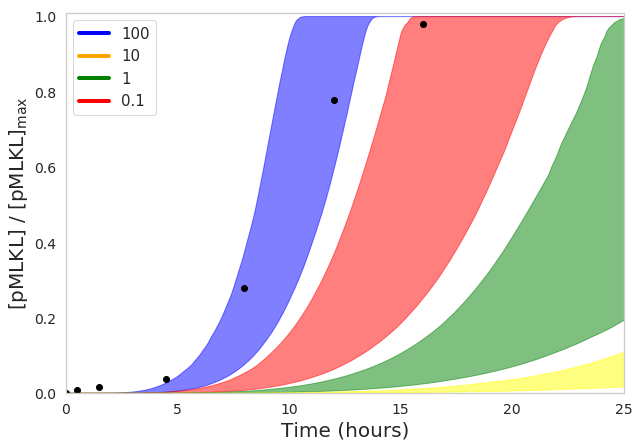

In [193]:
x = np.array([0, 30, 90, 270,480, 720, 960])
y100 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882, 0.2798939020159581, .7797294067, 0.98])
y10 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868, 0.17, 0.47])
y1 = np.array([0.109561346, 0,0.085233734,0.006063293,0.009426917,0.011334223, 0.02])
y01 = np.array([0, 0.006714721,0.007776423,0.00919829,0.001772636, 0.005, 0.013633013])

# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df = pd.concat([c0df100wt100, c0df100wt10, c0df100wt1,c0df100wt01],
               keys=['wt100','wt10','wt1','wt01' ],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot = {
    ('MLKLa_obs', 'wt100'): 'blue',
    ('MLKLa_obs', 'wt10'): 'red',
    ('MLKLa_obs', 'wt1'): 'green',
    ('MLKLa_obs', 'wt01'): 'yellow'
}

lower_quantile = 0.1  # 10%
uper_quantile = 0.90  # 90%
median = 0.5

fig, ax = plt.subplots(figsize = (10,7))
# plt.figure()
legend_keys = []
for obs_pair, colour in obs_to_plot.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
#     ax.plot(time_hrs, quantile_data.loc[:, median], color=colour)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile]/5544,
                    quantile_data.loc[:, upper_quantile]/5544,
                    color=colour,
                    alpha=0.50)
# plt.title('Model fitting across all TNF doses with Exp. Data',fontsize=14) # Title
plt.ylabel(r"[pMLKL] / [pMLKL]$_\mathrm{max}$", fontsize = 20) # Y label
plt.xlabel('Time (hours)', fontsize = 20) # X label
plt.xlim(xmin = 0, xmax =25)
plt.ylim(ymin = 0, ymax = 1.01)
#100 TNF
plt.scatter(x/60, y100, color = 'black')

custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='red', lw=4)]
plt.legend(custom_lines, ['100','10','1','0.1'], prop={'size': 15}, loc = 'upper left')
plt.grid(False)
# fig.savefig("updatedkos/necro_10k_5720_wdata_alltnf.pdf")
plt.show()

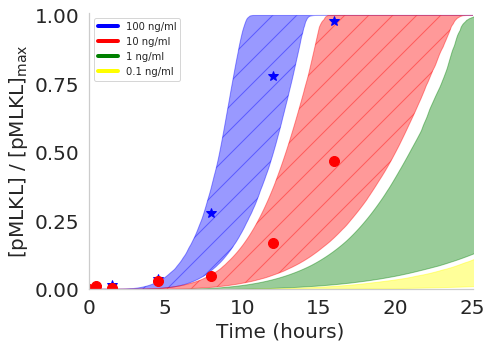

In [227]:
x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0,0.00885691708746097, 0.0161886154261265, 0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, 0.98])
# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df = pd.concat([c0df100wt100],
               keys=['wt100'],
               names=['group', 'simulation', 'time'])

df2 = pd.concat([c0df100wt10],
               keys=['wt10'],
               names=['group', 'simulation', 'time'])

df3 = pd.concat([c0df100wt1],
               keys=['wt1'],
               names=['group', 'simulation', 'time'])

df4 = pd.concat([c0df100wt01],
               keys=['wt01'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot1 = {
    ('MLKLa_obs', 'wt100'): 'blue'
}
obs_to_plot2 = {
    ('MLKLa_obs', 'wt10'): 'red'
}
obs_to_plot3 = {
    ('MLKLa_obs', 'wt1'): 'green'
}
obs_to_plot4 = {
    ('MLKLa_obs', 'wt01'): 'yellow'
}

lower_quantile = 0.05  # 10%
uper_quantile = 0.95  # 90%
median = 0.5

fig, ax = plt.subplots(figsize = (7,5))
# plt.figure()
legend_keys = []
for obs_pair, colour in obs_to_plot.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
#     ax.plot(time_hrs, quantile_data.loc[:, median], color=colour)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile]/5544,
                    quantile_data.loc[:, upper_quantile]/5544,
                    color=colour,
                    alpha=0.40,hatch='/')
    
for obs_pair, colour in obs_to_plot2.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df2[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs2 = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
#     ax.plot(time_hrs, quantile_data.loc[:, median], color=colour)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs2,
                    quantile_data.loc[:, lower_quantile]/5544,
                    quantile_data.loc[:, upper_quantile]/5544,
                    color=colour,
                    alpha=0.40,hatch='/') 
    
for obs_pair, colour in obs_to_plot3.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df3[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
#     ax.plot(time_hrs, quantile_data.loc[:, median], color=colour)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile]/5544,
                    quantile_data.loc[:, upper_quantile]/5544,
                    color=colour,
                    alpha=0.40) 
    
for obs_pair, colour in obs_to_plot4.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df4[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
#     ax.plot(time_hrs, quantile_data.loc[:, median], color=colour)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile]/5544,
                    quantile_data.loc[:, upper_quantile]/5544,
                    color=colour,
                    alpha=0.40)     
# plt.title('Model fitting across all TNF doses with Exp. Data',fontsize=14) # Title
plt.ylabel(r"[pMLKL] / [pMLKL]$_\mathrm{max}$", fontsize = 20)
plt.xlabel('Time (hours)', fontsize = 20) # X label
plt.xlim(xmin = 0, xmax =25)
plt.ylim(ymin = 0, ymax = 1.01)
#100 TNF
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
plt.plot(x/60, y100, '*', color = 'blue', ms = 10)
plt.plot(x/60, y10, 'o', color = 'red', ms = 10)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
ax.tick_params(axis='both', which='major', labelsize=20)
custom_lines = [Line2D([0], [0], color='blue', lw=4),
               Line2D([0], [0], color='red', lw=4),
               Line2D([0], [0], color='green', lw=4),
               Line2D([0], [0], color='yellow', lw=4)]
plt.legend(custom_lines, ['100 ng/ml', '10 ng/ml', '1 ng/ml','0.1 ng/ml', 'Data'], prop={'size': 10}, loc = 'upper left')
plt.grid(False)
plt.tight_layout()
fig.savefig('nerm_allpars_5720_wdata_alltnfwscatternew.pdf')
plt.show()

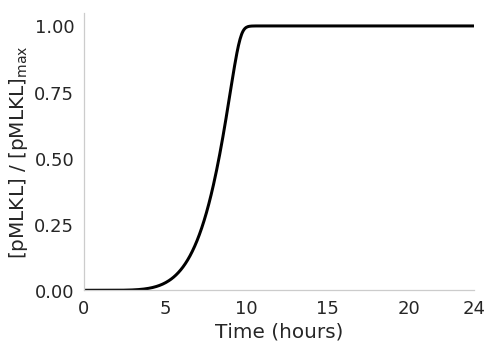

In [215]:
fig, ax = plt.subplots(figsize = (7,5))
# for n in range(len(all_pars[17:18])):
plt.plot(tspan/60, c0df100wt100.loc[18]['MLKLa_obs'].iloc[:]/5544, lw=3, 
             zorder = 1, linestyle = '-', color = 'black') 
plt.ylabel(r"[pMLKL] / [pMLKL]$_\mathrm{max}$", fontsize = 20) # Y label
plt.xlabel('Time (hours)', fontsize = 20) # X label
plt.xlim(xmin = 0.5, xmax = 16)
plt.ylim(ymin = 0.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.set_xticks([0.0, 5, 10, 15, 20, 24])
ax.set_yticks([0.0,0.25, 0.5, 0.75, 1.0])
ax.tick_params(axis='both', which='major', labelsize=18)
ax.grid(False)
plt.tight_layout()
plt.savefig('../pmlkl_methodsfig_ttd.pdf')
plt.show() 

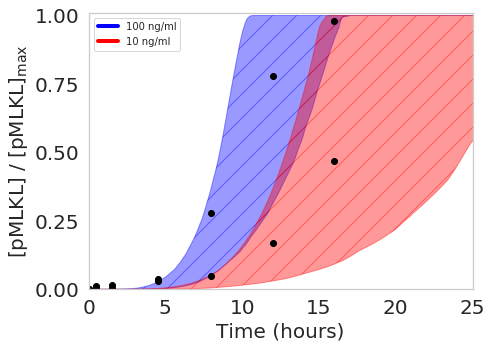

In [177]:
x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0,0.00885691708746097, 0.0161886154261265, 0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, 0.98])
# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df = pd.concat([c0df100wt100],
               keys=['wt100'],
               names=['group', 'simulation', 'time'])

df2 = pd.concat([c0df100wt10],
               keys=['wt10'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot = {
    ('MLKLa_obs', 'wt100'): 'blue'}

obs_to_plot2 = {
    ('MLKLa_obs', 'wt10'): 'red'}

lower_quantile = 0.01  # 10%
uper_quantile = 0.99  # 90%
median = 0.5

fig, ax = plt.subplots(figsize = (7,5))
# plt.figure()
legend_keys = []
for obs_pair, colour in obs_to_plot.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
#     ax.plot(time_hrs, quantile_data.loc[:, median], color=colour)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile]/5544,
                    quantile_data.loc[:, upper_quantile]/5544,
                    color=colour,
                    alpha=0.40,hatch='/')
    
for obs_pair, colour in obs_to_plot2.items():
    obs, group = obs_pair2
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df2[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs2 = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
#     ax.plot(time_hrs, quantile_data.loc[:, median], color=colour)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs2,
                    quantile_data.loc[:, lower_quantile]/5544,
                    quantile_data.loc[:, upper_quantile]/5544,
                    color=colour2,
                    alpha=0.40,hatch='/')    
# plt.title('Model fitting across all TNF doses with Exp. Data',fontsize=14) # Title
plt.ylabel(r"[pMLKL] / [pMLKL]$_\mathrm{max}$", fontsize = 20)
plt.xlabel('Time (hours)', fontsize = 20) # X label
plt.xlim(xmin = 0, xmax =25)
plt.ylim(ymin = 0, ymax = 1.01)
#100 TNF
plt.scatter(x/60, y100, color = 'black')
plt.scatter(x/60, y10, color = 'black')
ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
ax.tick_params(axis='both', which='major', labelsize=20)
custom_lines = [Line2D([0], [0], color='blue', lw=4),
               Line2D([0], [0], color='red', lw=4)]
plt.legend(custom_lines, ['100 ng/ml', '10 ng/ml'], prop={'size': 10}, loc = 'upper left')
plt.grid(False)
plt.tight_layout()
fig.savefig('nerm_allpars_5720_wdata_100_10tnfwscatter.pdf')
plt.show()

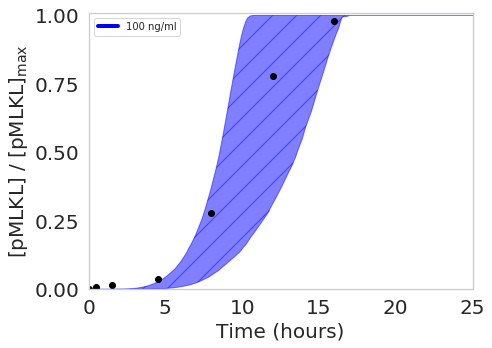

In [178]:
x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0,0.00885691708746097, 0.0161886154261265, 0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, 0.98])
# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df = pd.concat([c0df100wt100],
               keys=['wt100'],
               names=['group', 'simulation', 'time'])

df2 = pd.concat([c0df100wt10],
               keys=['wt10'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot = {
    ('MLKLa_obs', 'wt100'): 'blue'}

obs_to_plot2 = {
    ('MLKLa_obs', 'wt10'): 'red'}

lower_quantile = 0.01  # 10%
uper_quantile = 0.99  # 90%
median = 0.5

fig, ax = plt.subplots(figsize = (7,5))
# plt.figure()
legend_keys = []
for obs_pair, colour in obs_to_plot.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
#     ax.plot(time_hrs, quantile_data.loc[:, median], color=colour)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile]/5544,
                    quantile_data.loc[:, upper_quantile]/5544,
                    color=colour,
                    alpha=0.50,hatch='/')
    
# for obs_pair, colour in obs_to_plot2.items():
#     obs, group = obs_pair2
#     # Calculate 10%, 50%, and 90% quantiles for observable
#     quantile_data = df2[obs].loc[group].groupby(['time']).quantile(
#         q=[lower_quantile, median, upper_quantile]).unstack()
#     time_hrs2 = quantile_data.index / 60
#     # Plot the median line (50% quantile) for the observable
# #     ax.plot(time_hrs, quantile_data.loc[:, median], color=colour)
#     # Plot the 10% and 90% quantiles as an envelope
#     ax.fill_between(time_hrs2,
#                     quantile_data.loc[:, lower_quantile]/5544,
#                     quantile_data.loc[:, upper_quantile]/5544,
#                     color=colour2,
#                     alpha=0.50,hatch='/')    
# plt.title('Model fitting across all TNF doses with Exp. Data',fontsize=14) # Title
plt.ylabel(r"[pMLKL] / [pMLKL]$_\mathrm{max}$", fontsize = 20)
plt.xlabel('Time (hours)', fontsize = 20) # X label
plt.xlim(xmin = 0, xmax =25)
plt.ylim(ymin = 0, ymax = 1.01)
#100 TNF
plt.scatter(x/60, y100, color = 'black')
ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
ax.tick_params(axis='both', which='major', labelsize=20)
# plt.scatter(x/60, y10, color = 'black')
custom_lines = [Line2D([0], [0], color='blue', lw=4)]
plt.legend(custom_lines, ['100 ng/ml'], prop={'size': 10}, loc = 'upper left')
plt.grid(False)
plt.tight_layout()
fig.savefig('nerm_allpars_5720_wdata_100tnfwscatter.pdf')
plt.show()

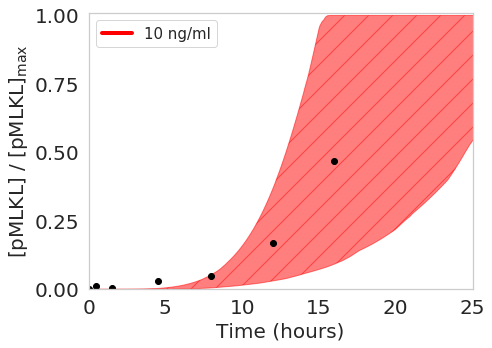

In [179]:
x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0,0.00885691708746097, 0.0161886154261265, 0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, 0.98])
# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df = pd.concat([c0df100wt100],
               keys=['wt100'],
               names=['group', 'simulation', 'time'])

df2 = pd.concat([c0df100wt10],
               keys=['wt10'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot = {
    ('MLKLa_obs', 'wt100'): 'blue'}

obs_to_plot2 = {
    ('MLKLa_obs', 'wt10'): 'red'}

lower_quantile = 0.01  # 10%
uper_quantile = 0.99  # 90%
median = 0.5

fig, ax = plt.subplots(figsize = (7,5))
# plt.figure()
legend_keys = []
# for obs_pair, colour in obs_to_plot.items():
#     obs, group = obs_pair
#     # Calculate 10%, 50%, and 90% quantiles for observable
#     quantile_data = df[obs].loc[group].groupby(['time']).quantile(
#         q=[lower_quantile, median, upper_quantile]).unstack()
#     time_hrs = quantile_data.index / 60
#     # Plot the median line (50% quantile) for the observable
# #     ax.plot(time_hrs, quantile_data.loc[:, median], color=colour)
#     # Plot the 10% and 90% quantiles as an envelope
#     ax.fill_between(time_hrs,
#                     quantile_data.loc[:, lower_quantile]/5544,
#                     quantile_data.loc[:, upper_quantile]/5544,
#                     color=colour,
#                     alpha=0.50,hatch='/')
    
for obs_pair, colour in obs_to_plot2.items():
    obs, group = obs_pair2
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df2[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs2 = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
#     ax.plot(time_hrs, quantile_data.loc[:, median], color=colour)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs2,
                    quantile_data.loc[:, lower_quantile]/5544,
                    quantile_data.loc[:, upper_quantile]/5544,
                    color=colour2,
                    alpha=0.50, hatch='/')    
# plt.title('Model fitting across all TNF doses with Exp. Data',fontsize=14) # Title
plt.ylabel(r"[pMLKL] / [pMLKL]$_\mathrm{max}$", fontsize = 20) # Y label
plt.xlabel('Time (hours)', fontsize = 20) # X label
plt.xlim(xmin = 0, xmax =25)
plt.ylim(ymin = 0, ymax = 1.01)
#100 TNF
plt.scatter(x/60, y10, color = 'black')
ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
ax.tick_params(axis='both', which='major', labelsize=20)
# plt.scatter(x/60, y10, color = 'black')
custom_lines = [Line2D([0], [0], color='red', lw=4)]
plt.legend(custom_lines, ['10 ng/ml'], prop={'size': 15}, loc = 'upper left')
plt.grid(False)
plt.tight_layout()
fig.savefig('nerm_allpars_5720_wdata_10tnfwscatter.pdf')
plt.show()

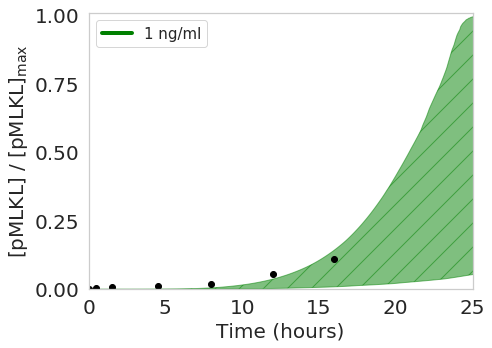

In [192]:
x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0,0.00885691708746097, 0.0161886154261265, 0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, 0.98])
# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
# df = pd.concat([c0df100wt100],
#                keys=['wt100'],
#                names=['group', 'simulation', 'time'])

df2 = pd.concat([c0df100wt1],
               keys=['wt1'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot2 = {
    ('MLKLa_obs', 'wt1'): 'green'}

lower_quantile = 0.01  # 10%
uper_quantile = 0.99  # 90%
median = 0.5

fig, ax = plt.subplots(figsize = (7,5))
# plt.figure()
legend_keys = []
# for obs_pair, colour in obs_to_plot.items():
#     obs, group = obs_pair
#     # Calculate 10%, 50%, and 90% quantiles for observable
#     quantile_data = df[obs].loc[group].groupby(['time']).quantile(
#         q=[lower_quantile, median, upper_quantile]).unstack()
#     time_hrs = quantile_data.index / 60
#     # Plot the median line (50% quantile) for the observable
# #     ax.plot(time_hrs, quantile_data.loc[:, median], color=colour)
#     # Plot the 10% and 90% quantiles as an envelope
#     ax.fill_between(time_hrs,
#                     quantile_data.loc[:, lower_quantile]/5544,
#                     quantile_data.loc[:, upper_quantile]/5544,
#                     color=colour,
#                     alpha=0.50,hatch='/')
    
for obs_pair, colour in obs_to_plot2.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df2[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
#     ax.plot(time_hrs, quantile_data.loc[:, median], color=colour)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile]/5544,
                    quantile_data.loc[:, upper_quantile]/5544,
                    color=colour,
                    alpha=0.50, hatch='/')    
y1_new = np.array([0,0.006063293, 0.009426917,0.011334223, 0.02,0.055233734, 0.109561346])
# plt.title('Model fitting across all TNF doses with Exp. Data',fontsize=14) # Title
plt.ylabel(r"[pMLKL] / [pMLKL]$_\mathrm{max}$", fontsize = 20) # Y label
plt.xlabel('Time (hours)', fontsize = 20) # X label
plt.xlim(xmin = 0, xmax =25)
plt.ylim(ymin = 0, ymax = 1.01)
#100 TNF
plt.scatter(x/60, y1_new, color = 'black')
ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
ax.tick_params(axis='both', which='major', labelsize=20)
# plt.scatter(x/60, y10, color = 'black')
custom_lines = [Line2D([0], [0], color='green', lw=4)]
plt.legend(custom_lines, ['1 ng/ml'], prop={'size': 15}, loc = 'upper left')
plt.grid(False)
plt.tight_layout()
# fig.savefig('nerm_allpars_5720_wdata_10tnfwscatter.pdf')
plt.show()

In [ ]:
import matplotlib
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15,10))
# tspan = np.linspace(0, 1440, 300)
for n in range(len(clus0_100)):
#     ax1.vlines(x = 600, ymin = 0, ymax = 5544, linestyle = 'dashed', colors= 'r', zorder = 2, label ='50% pMLKL')
    ax1.plot(tspan/60, c0df100wtn.loc[n]['MLKLa_obs'].iloc[:]/5544, lw=1.5, color ='blue', zorder = 1, alpha = 0.3)
    plt.legend(['clus0'], loc = 'best', fontsize = 14)
#     plt.ylim(ymax = 5544, ymin =0)
#     plt.xlim(xmax = 1440, xmin = 0)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax1.set_xlim(xmin = 0, xmax = 24)
    ax1.set_ylim(ymin = 0)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax1.grid(False)   
    custom_lines = [Line2D([0], [0], color='blue', lw=4),
                   Line2D([0], [0], color='red', lw=4)]
    ax1.legend(custom_lines, ['Clus0', 'pMLKL Data'], prop={'size': 12}, loc = 'best')
    
# tspan2 = np.linspace(0, 2160, 300)    
for n in range(len(clus1_100)):
#     ax2.vlines(x = 600, ymin = 0, ymax = 5544, linestyle = 'dashed', colors= 'r', zorder = 2, label= '50% pMLKL')
    ax2.plot(tspan/60, c0df100wtn.loc[n]['MLKLa_obs'].iloc[:]/5544,lw=1.5, color ='blue', zorder = 1, alpha = 0.3)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax2.set_xlim(xmin = 0, xmax = 24)
    ax2.set_ylim(ymin = 0)
    ax2.grid(False)  
    custom_lines = [Line2D([0], [0], color='blue', lw=4),
                   Line2D([0], [0], color='red', lw=4)]
    ax2.legend(custom_lines, ['Clus1', 'pMLKL Data'], prop={'size': 12}, loc = 'best')
    
for n in range(len(clus2_100)):
#     ax3.vlines(x = 600, ymin = 0, ymax = 5544, linestyle = 'dashed', colors= 'r', zorder = 2, label ='50% pMLKL')
    ax3.plot(tspan/60, c0df100wtn.loc[n]['MLKLa_obs'].iloc[:]/5544,lw=1.5, color ='blue', zorder = 1, alpha = 0.3)  
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax3.set_xlim(xmin = 0, xmax = 24)
    ax3.set_ylim(ymin = 0)
    ax3.grid(False)  
    custom_lines = [Line2D([0], [0], color='blue', lw=4),
                   Line2D([0], [0], color='red', lw=4)]
    ax3.legend(custom_lines, ['Clus2', 'pMLKL Data'], prop={'size': 12}, loc = 'best')
    
for n in range(len(clus3_100)):
    plt.plot(tspan/60, c0df100wtn.loc[n]['MLKLa_obs'].iloc[:]/5544, lw=1.5, color ='blue', zorder = 1, alpha = 0.3)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
#     plt.xlabel("Time (in hr)", fontsize=15)
#     plt.ylabel("Amount (normalized)", fontsize=15)
    ax4.set_xlim(xmin = 0, xmax = 24)
    ax4.set_ylim(ymin = 0)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax4.grid(False)  
    custom_lines = [Line2D([0], [0], color='blue', lw=4),
                   Line2D([0], [0], color='red', lw=4)]
    ax4.legend(custom_lines, ['Clus3', 'pMLKL Data'], prop={'size': 12}, loc = 'best')
 
fig.text(0.5, 0.04, 'Time (Hours)', ha='center', va='center',fontsize = 16)
fig.text(0.06, 0.5, 'Amount of A20 pMLKL under 100 ng/ml TNF(Normalized)',
         ha='center', va='center', rotation='vertical', fontsize = 16)
# plt.savefig('pmlkl_100tnf_4clus_5720_A20KO.pdf')
plt.show()

In [ ]:
import matplotlib
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15,10))
# tspan = np.linspace(0, 1440, 300)
for n in range(len(clus0_100)):
#     ax1.vlines(x = 600, ymin = 0, ymax = 5544, linestyle = 'dashed', colors= 'r', zorder = 2, label ='50% pMLKL')
    ax1.plot(tspan/60, wtclus100.observable(o.A20(brip = None)), lw=1.5, color ='blue', zorder = 1, alpha = 0.3)
    plt.legend(['clus0'], loc = 'best', fontsize = 14)
#     plt.ylim(ymax = 5544, ymin =0)
#     plt.xlim(xmax = 1440, xmin = 0)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax1.set_xlim(xmin = 0, xmax = 24)
    ax1.set_ylim(ymin = 0)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax1.grid(False)   
    custom_lines = [Line2D([0], [0], color='blue', lw=4),
                   Line2D([0], [0], color='red', lw=4)]
    ax1.legend(custom_lines, ['Clus0', 'pMLKL Data'], prop={'size': 12}, loc = 'best')
    
# tspan2 = np.linspace(0, 2160, 300)    
for n in range(len(clus1_100)):
#     ax2.vlines(x = 600, ymin = 0, ymax = 5544, linestyle = 'dashed', colors= 'r', zorder = 2, label= '50% pMLKL')
    ax2.plot(tspan/60, cA20_obs0,lw=1.5, color ='blue', zorder = 1, alpha = 0.3)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax2.set_xlim(xmin = 0, xmax = 24)
    ax2.set_ylim(ymin = 0)
    ax2.grid(False)  
    custom_lines = [Line2D([0], [0], color='blue', lw=4),
                   Line2D([0], [0], color='red', lw=4)]
    ax2.legend(custom_lines, ['Clus1', 'pMLKL Data'], prop={'size': 12}, loc = 'best')
    
for n in range(len(clus2_100)):
#     ax3.vlines(x = 600, ymin = 0, ymax = 5544, linestyle = 'dashed', colors= 'r', zorder = 2, label ='50% pMLKL')
    ax3.plot(tspan/60, A20_obs0,lw=1.5, color ='blue', zorder = 1, alpha = 0.3)  
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax3.set_xlim(xmin = 0, xmax = 24)
    ax3.set_ylim(ymin = 0)
    ax3.grid(False)  
    custom_lines = [Line2D([0], [0], color='blue', lw=4),
                   Line2D([0], [0], color='red', lw=4)]
    ax3.legend(custom_lines, ['Clus2', 'pMLKL Data'], prop={'size': 12}, loc = 'best')
    
for n in range(len(clus3_100)):
    plt.plot(tspan/60, A20_obs0, lw=1.5, color ='blue', zorder = 1, alpha = 0.3)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
#     plt.xlabel("Time (in hr)", fontsize=15)
#     plt.ylabel("Amount (normalized)", fontsize=15)
    ax4.set_xlim(xmin = 0, xmax = 24)
    ax4.set_ylim(ymin = 0)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax4.grid(False)  
    custom_lines = [Line2D([0], [0], color='blue', lw=4),
                   Line2D([0], [0], color='red', lw=4)]
    ax4.legend(custom_lines, ['Clus3', 'pMLKL Data'], prop={'size': 12}, loc = 'best')
 
fig.text(0.5, 0.04, 'Time (Hours)', ha='center', va='center',fontsize = 16)
fig.text(0.06, 0.5, 'Amount of A20 pMLKL under 100 ng/ml TNF(Normalized)',
         ha='center', va='center', rotation='vertical', fontsize = 16)
# plt.savefig('pmlkl_100tnf_4clus_5720_A20KO.pdf')
plt.show()

In [ ]:
plt.figure()
for n in range(len(clus2_100[500:600])):
    plt.plot(tspan/60, A20_obs2[n], lw=1.5, color ='blue', zorder = 1, alpha = 0.5)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount (normalized)", fontsize=15)
# plt.xlim(xmin = 0, xmax = 24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()      

In [ ]:
plt.figure()
for n in range(len(clus0_100)):
    plt.plot(tspan/60, c0df100wt10.loc[n]['MLKLa_obs'].iloc[:], lw=1.5, color ='blue', zorder = 1, alpha = 0.5)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount (normalized)", fontsize=15)
# plt.xlim(xmin = 0, xmax = 24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()   

In [ ]:
plt.figure()
for n in range(len(clus0_100)):
    plt.plot(tspan/60, c0df100wt10.loc[n]['MLKLa_obs'].iloc[:], lw=1.5, color ='blue', zorder = 1, alpha = 0.5)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount (normalized)", fontsize=15)
# plt.xlim(xmin = 0, xmax = 24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
plt.figure()
for n in range(len(clus0_100)):
    plt.plot(tspan/60, c0df100wt1.loc[n]['MLKLa_obs'].iloc[:], lw=1.5, color ='blue', zorder = 1, alpha = 0.5)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount (normalized)", fontsize=15)
# plt.xlim(xmin = 0, xmax = 24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()   

In [ ]:
for i,obs in enumerate(model.observables):
    print(i,":",obs)

In [ ]:
plt.figure()
for n in range(len(clus0_100)):
    plt.plot(tspan/60, c0df100wt01.loc[n]['MLKLa_obs'].iloc[:], lw=1.5, color ='blue', zorder = 1, alpha = 0.5)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount (normalized)", fontsize=15)
# plt.xlim(xmin = 0, xmax = 24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()   

In [ ]:
tnf100 = []
clus_idxs = np.array(range(wtclus100.nsims))
for idx in clus_idxs: 
    mlkl_traj = wtclus100.observables[idx]['MLKLa_obs']
    ysim_mlkl_norm = mlkl_traj / np.nanmax(mlkl_traj)
    st, sc, sk = scipy.interpolate.splrep(tspan, ysim_mlkl_norm)
    try:
        t10 = scipy.interpolate.sproot((st, sc - 0.10, sk))[0]
        t90 = scipy.interpolate.sproot((st, sc - 0.90, sk))[0]
    except IndexError:
        t10 = 0
        t90 = 0

    # time of death  = halfway point between 10 and 90%
    td = (t10 + t90) / 2
    tnf100.append(td)

In [ ]:
tnf10 = []
clus_idxs = np.array(range(wtclus10.nsims))
for idx in clus_idxs: 
    mlkl_traj = wtclus10.observables[idx]['MLKLa_obs']
    ysim_mlkl_norm = mlkl_traj / np.nanmax(mlkl_traj)
    st, sc, sk = scipy.interpolate.splrep(tspan, ysim_mlkl_norm)
    try:
        t10 = scipy.interpolate.sproot((st, sc - 0.10, sk))[0]
        t90 = scipy.interpolate.sproot((st, sc - 0.90, sk))[0]
    except IndexError:
        t10 = 0
        t90 = 0

    # time of death  = halfway point between 10 and 90%
    td = (t10 + t90) / 2
    tnf10.append(td)

In [ ]:
tnf1 = []
clus_idxs = np.array(range(wtclus1.nsims))
for idx in clus_idxs: 
    mlkl_traj = wtclus1.observables[idx]['MLKLa_obs']
    ysim_mlkl_norm = mlkl_traj / np.nanmax(mlkl_traj)
    st, sc, sk = scipy.interpolate.splrep(tspan, ysim_mlkl_norm)
    try:
        t10 = scipy.interpolate.sproot((st, sc - 0.10, sk))[0]
        t90 = scipy.interpolate.sproot((st, sc - 0.90, sk))[0]
    except IndexError:
        t10 = 0
        t90 = 0

    # time of death  = halfway point between 10 and 90%
    td = (t10 + t90) / 2
    tnf1.append(td)

In [ ]:
tnf01 = []
clus_idxs = np.array(range(wtclus01.nsims))
for idx in clus_idxs: 
    mlkl_traj = wtclus01.observables[idx]['MLKLa_obs']
    ysim_mlkl_norm = mlkl_traj / np.nanmax(mlkl_traj)
    st, sc, sk = scipy.interpolate.splrep(tspan, ysim_mlkl_norm)
    try:
        t10 = scipy.interpolate.sproot((st, sc - 0.10, sk))[0]
        t90 = scipy.interpolate.sproot((st, sc - 0.90, sk))[0]
    except IndexError:
        t10 = 0
        t90 = 0

    # time of death  = halfway point between 10 and 90%
    td = (t10 + t90) / 2
    tnf01.append(td)

In [ ]:
sns.set_style("white")
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
plt.figure()
sns.distplot(tnf100, label ='100ng/ml TNF',color="dodgerblue", bins=50, **kwargs)
sns.distplot(tnf10, label = '10ng/ml TNF',color="deeppink", bins=50, **kwargs)
sns.distplot(tnf1, label = '1ng/ml TNF',color="orange", bins=50, **kwargs)
sns.distplot(tnf01, label = '0.1ng/ml TNF',color="green", bins=50, **kwargs)
# sns.distplot(CI_a20, label='uncluster',color="orange", bins=25, **kwargs)
# sns.distplot(CI_cyld, label='uncluster',color="deeppink", bins=25, **kwargs)
plt.xlabel('time (min)')
plt.ylabel('Frequency')
plt.legend(loc = 'best')
# plt.xlim(xmax = 800)
# plt.ylim(ymax = 0.04)
# plt.savefig('k63_necrosome_pmlkl.pdf')
plt.show()

In [ ]:
plt.figure()
for n in range(len(clus0_100)):
    plt.plot(tspan/60, c0df100wtn.loc[n]['MLKLa_obs'].iloc[:]/5544, lw=1.5, color ='blue', zorder = 1, alpha = 0.5)
#     plt.plot(tspan/60, 1-(c0df100wt10.loc[n]['MLKLa_obs'].iloc[:]/5544), lw=1.5, color ='deeppink', zorder = 1, alpha = 0.5)
#     plt.plot(tspan/60, 1-(c0df100wt1.loc[n]['MLKLa_obs'].iloc[:]/5544), lw=1.5, color ='green', zorder = 1, alpha = 0.5)
#     plt.plot(tspan/60, 1-(c0df100wt01.loc[n]['MLKLa_obs'].iloc[:]/5544), lw=1.5, color ='orange', zorder = 1, alpha = 0.5)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount (normalized)", fontsize=15)
# plt.xlim(xmin = 0, xmax = 24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()  

In [ ]:
plt.figure()
for n in range(len(clus0_100)):
#     plt.plot(tspan/60, 1-(c0df100wtn.loc[n]['MLKLa_obs'].iloc[:]/5544), lw=1.5, color ='blue', zorder = 1, alpha = 0.5)
    plt.plot(tspan/60, c0df100wt10.loc[n]['MLKLa_obs'].iloc[:]/5544, lw=1.5, color ='deeppink', zorder = 1, alpha = 0.5)
#     plt.plot(tspan/60, 1-(c0df100wt1.loc[n]['MLKLa_obs'].iloc[:]/5544), lw=1.5, color ='green', zorder = 1, alpha = 0.5)
#     plt.plot(tspan/60, 1-(c0df100wt01.loc[n]['MLKLa_obs'].iloc[:]/5544), lw=1.5, color ='orange', zorder = 1, alpha = 0.5)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount (normalized)", fontsize=15)
# plt.xlim(xmin = 0, xmax = 24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()  

In [ ]:
plt.figure()
for n in range(len(clus0_100)):
#     plt.plot(tspan/60, 1-(c0df100wtn.loc[n]['MLKLa_obs'].iloc[:]/5544), lw=1.5, color ='blue', zorder = 1, alpha = 0.5)
#     plt.plot(tspan/60, 1-(c0df100wt10.loc[n]['MLKLa_obs'].iloc[:]/5544), lw=1.5, color ='deeppink', zorder = 1, alpha = 0.5)
    plt.plot(tspan/60, 1-(c0df100wt1.loc[n]['MLKLa_obs'].iloc[:]/5544), lw=1.5, color ='green', zorder = 1, alpha = 0.5)
#     plt.plot(tspan/60, 1-(c0df100wt01.loc[n]['MLKLa_obs'].iloc[:]/5544), lw=1.5, color ='orange', zorder = 1, alpha = 0.5)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount (normalized)", fontsize=15)
# plt.xlim(xmin = 0, xmax = 24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()  